In [60]:
# https://towardsdatascience.com/time-series-forecasting-predicting-stock-prices-using-facebooks-prophet-model-9ee1657132b5
# https://colab.research.google.com/drive/1l4bbQkcjn7Oy-SMnaLnlobQ4sorgHB2S?usp=sharing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web
goal = "ETH-USD"
data = web.DataReader(goal, 'yahoo')

In [61]:
data.tail()

High         Low        Open       Close        Volume  \
Date                                                                       
2020-09-24  357.957245  339.350311  349.363129  352.161865  1.225427e+10   
2020-09-25  355.960632  348.129639  352.531250  354.965271  1.103675e+10   
2020-09-26  362.051361  349.094391  354.587219  357.321686  1.146439e+10   
2020-09-27  366.890259  354.825134  357.311157  354.950500  1.210251e+10   
2020-09-29  359.286133  351.227386  354.192322  353.648895  1.038523e+10   

             Adj Close  
Date                    
2020-09-24  352.161865  
2020-09-25  354.965271  
2020-09-26  357.321686  
2020-09-27  354.950500  
2020-09-29  353.648895

In [62]:
data.describe()

High          Low         Open        Close        Volume  \
count  1825.000000  1825.000000  1825.000000  1825.000000  1.825000e+03   
mean    223.627009   207.483969   216.006764   216.147496  4.083384e+09   
std     238.313970   216.514924   228.369217   228.227685  5.456232e+09   
min       0.482988     0.420897     0.431589     0.434829  1.021280e+05   
25%      13.309100    12.544700    12.921000    12.919700  2.864040e+07   
50%     181.498291   171.826599   176.067841   176.351517  1.693470e+09   
75%     299.924011   282.014008   291.764618   292.332001  6.716829e+09   
max    1432.880005  1290.599976  1397.479980  1396.420044  3.142113e+10   

         Adj Close  
count  1825.000000  
mean    216.147496  
std     228.227685  
min       0.434829  
25%      12.919700  
50%     176.351517  
75%     292.332001  
max    1396.420044

In [63]:
data.reset_index(level=0, inplace=True)

In [64]:
data.head()

Date      High       Low      Open     Close    Volume  Adj Close
0 2015-09-30  0.734307  0.655906  0.734307  0.690215  596084.0   0.690215
1 2015-10-01  0.691120  0.654605  0.683732  0.678574  219318.0   0.678574
2 2015-10-02  0.709204  0.675482  0.678783  0.687171  163326.0   0.687171
3 2015-10-03  0.693126  0.660716  0.686343  0.668379  103497.0   0.668379
4 2015-10-04  0.674438  0.624450  0.666784  0.628643  234263.0   0.628643

In [65]:
# Select only the important features i.e. the date and price
data = data[["Date","Close"]] # select Date and Price
# Rename the features: These names are NEEDED for the model fitting
data = data.rename(columns = {"Date":"ds","Close":"y"}) #renaming the columns of the dataset
data.head(5)

ds         y
0 2015-09-30  0.690215
1 2015-10-01  0.678574
2 2015-10-02  0.687171
3 2015-10-03  0.668379
4 2015-10-04  0.628643

In [66]:
from fbprophet import Prophet
m = Prophet(daily_seasonality = True) # the Prophet class (model)
m.fit(data) # fit the model using all data

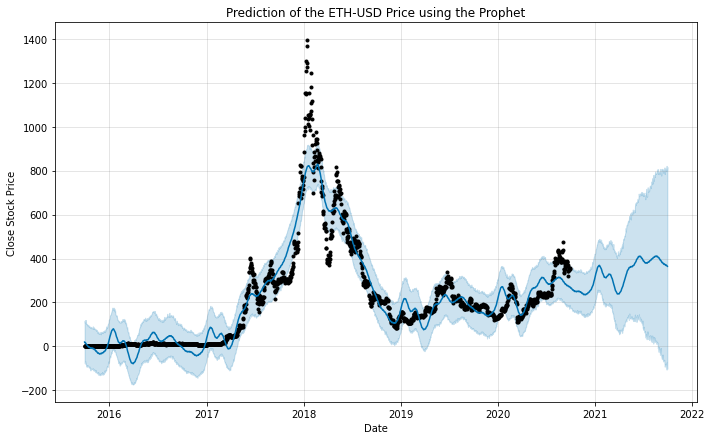

In [67]:
future = m.make_future_dataframe(periods=365) #we need to specify the number of days in future
prediction = m.predict(future)
m.plot(prediction)
plt.title("Prediction of the " + goal + " Price using the Prophet")
plt.xlabel("Date")
plt.ylabel("Close Stock Price")
plt.show()

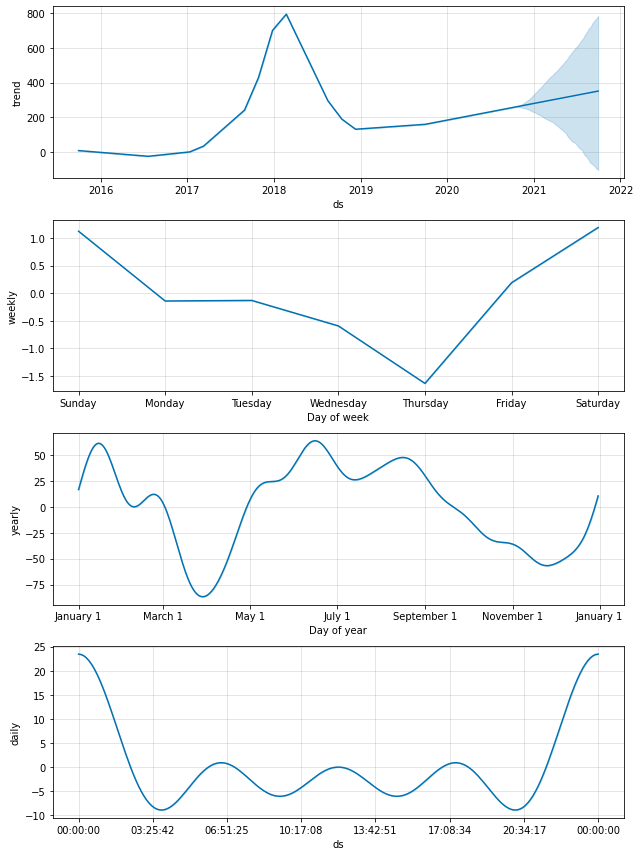

In [68]:
# Plot the trend, weekly, seasonally, yearly and daily components

m.plot_components(prediction)
plt.show()

In [69]:
prediction.shape

(2185, 22)

In [70]:
future_prediction = prediction[-365:]

In [71]:
future_prediction.head()

ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
1820 2020-09-30  254.791956  174.249484  363.057460   254.791956   254.791956   
1821 2020-10-01  255.055673  172.540152  359.741789   255.055673   255.055673   
1822 2020-10-02  255.319391  176.407276  360.998545   255.319391   255.319391   
1823 2020-10-03  255.583109  175.628911  365.003779   255.583109   255.583109   
1824 2020-10-04  255.846827  174.942288  355.852818   255.846827   255.846827   

      additive_terms  additive_terms_lower  additive_terms_upper      daily  \
1820       12.276876             12.276876             12.276876  23.454521   
1821        9.869799              9.869799              9.869799  23.454521   
1822       10.282726             10.282726             10.282726  23.454521   
1823        9.831022              9.831022              9.831022  23.454521   
1824        8.281320              8.281320              8.281320  23.454521   

      ...    weekly  weekly_lower  weekly_upper     yearly  yearly_lower  \
1820  ... -0.593931     -0.593931     -0.593931 -10.583714    -10.583714   
1821  ... -1.636705     -1.636705     -1.636705 -11.948017    -11.948017   
1822  ...  0.189479      0.189479      0.189479 -13.361274    -13.361274   
1823  ...  1.191092      1.191092      1.191092 -14.814592    -14.814592   
1824  ...  1.123814      1.123814      1.123814 -16.297016    -16.297016   

      yearly_upper  multiplicative_terms  multiplicative_terms_lower  \
1820    -10.583714                   0.0                         0.0   
1821    -11.948017                   0.0                         0.0   
1822    -13.361274                   0.0                         0.0   
1823    -14.814592                   0.0                         0.0   
1824    -16.297016                   0.0                         0.0   

      multiplicative_terms_upper        yhat  
1820                         0.0  267.068832  
1821                         0.0  264.925473  
1822                         0.0  265.602117  
1823                         0.0  265.414130  
1824                         0.0  264.128146  

[5 rows x 22 columns]

In [72]:
future_prediction[:10]

ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
1820 2020-09-30  254.791956  174.249484  363.057460   254.791956   254.791956   
1821 2020-10-01  255.055673  172.540152  359.741789   255.055673   255.055673   
1822 2020-10-02  255.319391  176.407276  360.998545   255.319391   255.319391   
1823 2020-10-03  255.583109  175.628911  365.003779   255.583109   255.583109   
1824 2020-10-04  255.846827  174.942288  355.852818   255.846827   255.846827   
1825 2020-10-05  256.110544  171.211573  349.867240   256.110544   256.110544   
1826 2020-10-06  256.374262  163.859247  351.633570   256.374262   256.374262   
1827 2020-10-07  256.637980  166.923501  352.703792   256.637980   256.637980   
1828 2020-10-08  256.901698  160.136121  352.714267   256.901698   256.901698   
1829 2020-10-09  257.165415  161.373187  357.816506   257.165415   257.165415   

      additive_terms  additive_terms_lower  additive_terms_upper      daily  \
1820       12.276876             12.276876             12.276876  23.454521   
1821        9.869799              9.869799              9.869799  23.454521   
1822       10.282726             10.282726             10.282726  23.454521   
1823        9.831022              9.831022              9.831022  23.454521   
1824        8.281320              8.281320              8.281320  23.454521   
1825        5.516573              5.516573              5.516573  23.454521   
1826        4.025729              4.025729              4.025729  23.454521   
1827        2.074718              2.074718              2.074718  23.454521   
1828       -0.428945             -0.428945             -0.428945  23.454521   
1829       -0.020495             -0.020495             -0.020495  23.454521   

      ...    weekly  weekly_lower  weekly_upper     yearly  yearly_lower  \
1820  ... -0.593931     -0.593931     -0.593931 -10.583714    -10.583714   
1821  ... -1.636705     -1.636705     -1.636705 -11.948017    -11.948017   
1822  ...  0.189479      0.189479      0.189479 -13.361274    -13.361274   
1823  ...  1.191092      1.191092      1.191092 -14.814592    -14.814592   
1824  ...  1.123814      1.123814      1.123814 -16.297016    -16.297016   
1825  ... -0.142082     -0.142082     -0.142082 -17.795866    -17.795866   
1826  ... -0.131668     -0.131668     -0.131668 -19.297125    -19.297125   
1827  ... -0.593931     -0.593931     -0.593931 -20.785873    -20.785873   
1828  ... -1.636705     -1.636705     -1.636705 -22.246761    -22.246761   
1829  ...  0.189479      0.189479      0.189479 -23.664495    -23.664495   

      yearly_upper  multiplicative_terms  multiplicative_terms_lower  \
1820    -10.583714                   0.0                         0.0   
1821    -11.948017                   0.0                         0.0   
1822    -13.361274                   0.0                         0.0   
1823    -14.814592                   0.0                         0.0   
1824    -16.297016                   0.0                         0.0   
1825    -17.795866                   0.0                         0.0   
1826    -19.297125                   0.0                         0.0   
1827    -20.785873                   0.0                         0.0   
1828    -22.246761                   0.0                         0.0   
1829    -23.664495                   0.0                         0.0   

      multiplicative_terms_upper        yhat  
1820                         0.0  267.068832  
1821                         0.0  264.925473  
1822                         0.0  265.602117  
1823                         0.0  265.414130  
1824                         0.0  264.128146  
1825                         0.0  261.627118  
1826                         0.0  260.399991  
1827                         0.0  258.712698  
1828                         0.0  256.472753  
1829                         0.0  257.144921  

[10 rows x 22 columns]

In [74]:
future_prediction.yhat.values[:50]

array([267.06883157, 264.92547258, 265.60211695, 265.41413047,
       264.12814636, 261.62711782, 260.39999146, 258.71269752,
       256.47275284, 257.14492057, 257.05042221, 255.95866331,
       253.75216742, 252.91622951, 251.70998599, 250.03119524,
       251.33216821, 251.91933662, 251.54540989, 250.07480268,
       249.97382955, 249.48234751, 248.47912329, 250.39834676,
       251.52976049, 251.611339  , 250.49518364, 250.63811476,
       250.27362954, 249.27749211, 251.08437   , 251.98798255,
       251.73369377, 250.18421743, 249.8099214 , 248.86040785,
       247.22964693, 248.37209159, 248.60225494, 247.68669966,
       245.50912588, 244.56006339, 243.10786373, 241.06328799,
       241.89513535, 241.92940884, 240.94098133, 238.8184586 ,
       238.05375285, 236.91306678])

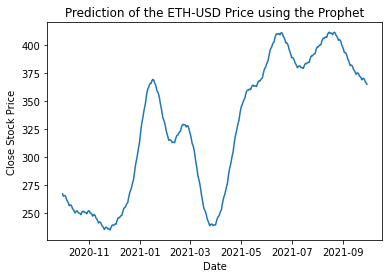

In [75]:
plt.plot(future_prediction.ds.values, future_prediction.yhat.values)
plt.title("Prediction of the " + goal + " Price using the Prophet")
plt.xlabel("Date")
plt.ylabel("Close Stock Price")
plt.show()

In [79]:
future_prediction.yhat.values[:364]

array([267.06883157, 264.92547258, 265.60211695, 265.41413047,
       264.12814636, 261.62711782, 260.39999146, 258.71269752,
       256.47275284, 257.14492057, 257.05042221, 255.95866331,
       253.75216742, 252.91622951, 251.70998599, 250.03119524,
       251.33216821, 251.91933662, 251.54540989, 250.07480268,
       249.97382955, 249.48234751, 248.47912329, 250.39834676,
       251.52976049, 251.611339  , 250.49518364, 250.63811476,
       250.27362954, 249.27749211, 251.08437   , 251.98798255,
       251.73369377, 250.18421743, 249.8099214 , 248.86040785,
       247.22964693, 248.37209159, 248.60225494, 247.68669966,
       245.50912588, 244.56006339, 243.10786373, 241.06328799,
       241.89513535, 241.92940884, 240.94098133, 238.8184586 ,
       238.05375285, 236.91306678, 235.30158479, 236.67931385,
       237.36056453, 237.10602602, 235.78811951, 235.88112855,
       235.63278901, 234.92961642, 237.21339294, 238.78128372,
       239.37851574, 238.86428352, 239.70236162, 240.13

In [77]:
future_prediction[['ds', 'yhat']].head()

ds        yhat
1820 2020-09-30  267.068832
1821 2020-10-01  264.925473
1822 2020-10-02  265.602117
1823 2020-10-03  265.414130
1824 2020-10-04  264.128146

In [78]:
data[data['ds'] == '2020-09-29']

ds           y
1824 2020-09-29  353.648895